 **Linear Regression Neuron: Learning by Gradient
Descent (No ML Libraries)**

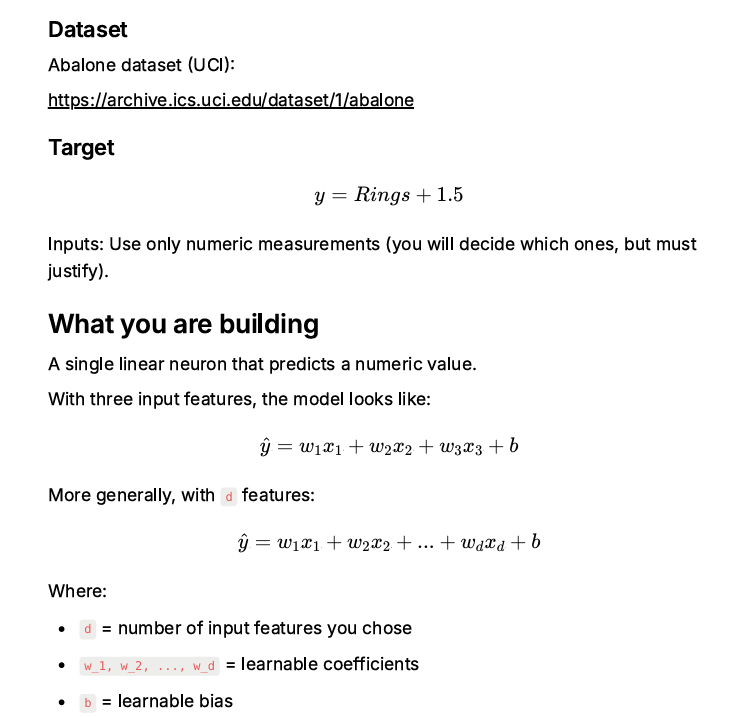

In [1]:
import pandas as pd
import numpy as np

In [15]:
#A1: Load dataset
columns = [
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight",
    "VisceraWeight", "ShellWeight", "Rings"
]

df = pd.read_csv("/content/abalone.data", header=None, names=columns)


# Print information
print("Number of rows:", len(df))
print("Column names:", df.columns)
print("Columns:", df.columns)
print(df.head())

Number of rows: 4177
Column names: Index(['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')
Columns: Index(['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')
  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


**Explanation**

**What this step does:**
Loads the abalone dataset into a table where each row represents one abalone and each column represents a measurement.

**Why it is needed:**
Machine learning models require structured numerical data to learn patterns.

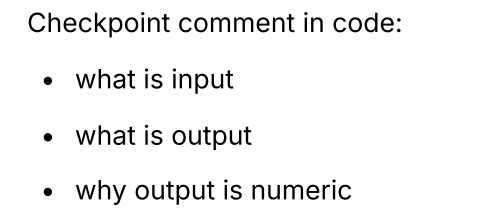

In [ ]:
# What is Input: Physical Measurements of Abalone (length, diameter, height, etc.)
# What is Output: Rings (age indicator)
# Why output is numeric: Rings is a count value representing age, so it is numeric

In [16]:
#A2. Convert Target
# Create target y = Rings + 1.5
df["y"] = df["Rings"] + 1.5

**Explanation**

**What this step does:**
Creates a numeric target representing estimated age.

**Why it is needed:**
The model predicts a numeric value, so the target must be numeric.

In [18]:
#A3. Choose Features
# Select exactly 3 numeric features
features = ["Length", "Diameter", "Height"]

X = df[features].values
y = df["y"].values.reshape(-1, 1)

**Explanation**

**What this step does:**
Selects three input features for the model.

**Why it is needed:**
The model can only learn from the features we provide.

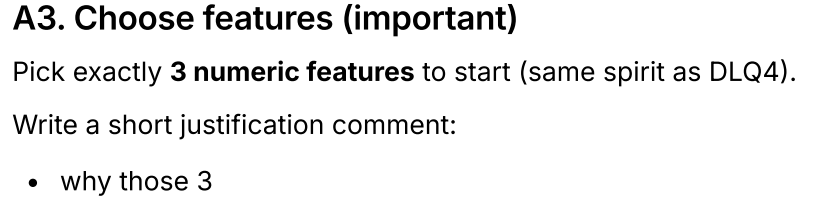

In [ ]:
# Justification:
# Feature 1: Length – reflects overall size and growth.
# Feature 2: Diameter – indicates body width, related to maturity.
# Feature 3: Height – thickness, which increases with age.

In [20]:
#A4. Train–Test Split (80/20)
N = len(X)
split_index = int(0.8 * N)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (3341, 3) (3341, 1)
Test shapes: (836, 3) (836, 1)


**Explanation**

**What this step does:**
Splits the data into training and testing sets.

**Why it is needed:**
To evaluate the model on unseen data.

In [21]:
#A5. Normalize Inputs
# Compute mean and std from training data only
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# Normalize
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

**Explanation**

**What this step does:**
Scales features using training statistics.

**Why it is needed:**
Prevents features with larger values from dominating learning.

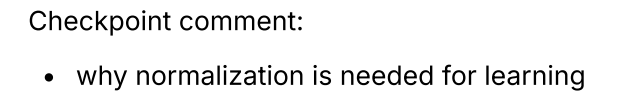

In [ ]:
# Why Normalization is needed for learning:
# It keeps all features on similar scales, preventing unstable updates
# and helping gradient descent converge faster.

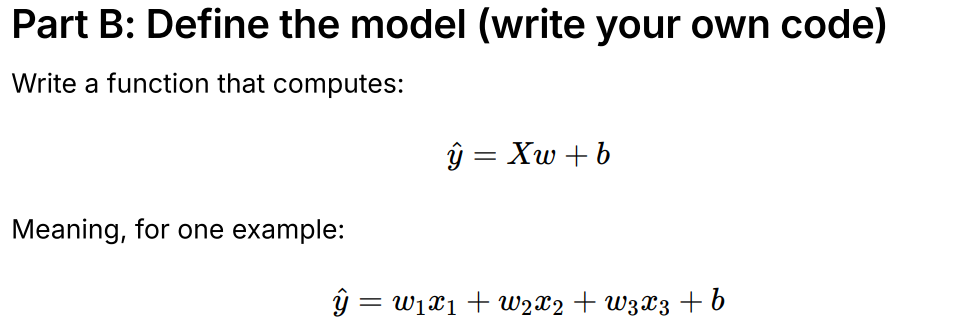

In [23]:
#Part B: Define the Model
def forward(X, w, b):
    """
    computes y_hat = Xw + b
    """
    y_hat = X @ w + b

    # Print shapes once
    print("Shape X:", X.shape)
    print("Shape w:", w.shape)
    print("Shape b:", np.shape(b))
    print("Shape y_hat:", y_hat.shape)

    return y_hat

**Explanation**

**What this step does:**
Computes predicted output using a linear equation.

**Why it is needed:**
The model must produce predictions before measuring error.

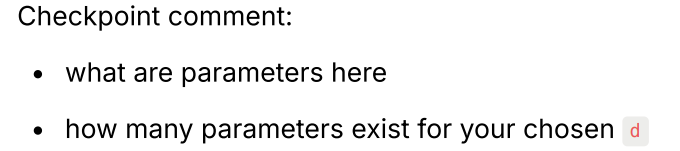

In [ ]:
  # Parameters are: weights w and bias b
  # Number of Parameters: d weights + 1 bias

In [25]:
#Part C: Define Loss (MSE)
def mse(y, y_hat):
    loss = np.mean((y - y_hat) ** 2)

    return loss

**Explanation**

**What this step does:**
Measures how far predictions are from true values.

**Why it is needed:**
Provides a signal to guide learning.

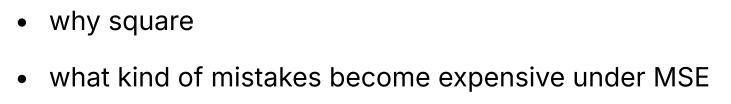

In [ ]:
# Why square: penalizes larger errors more heavily
# What mistakes are expensive: predictions far from true values

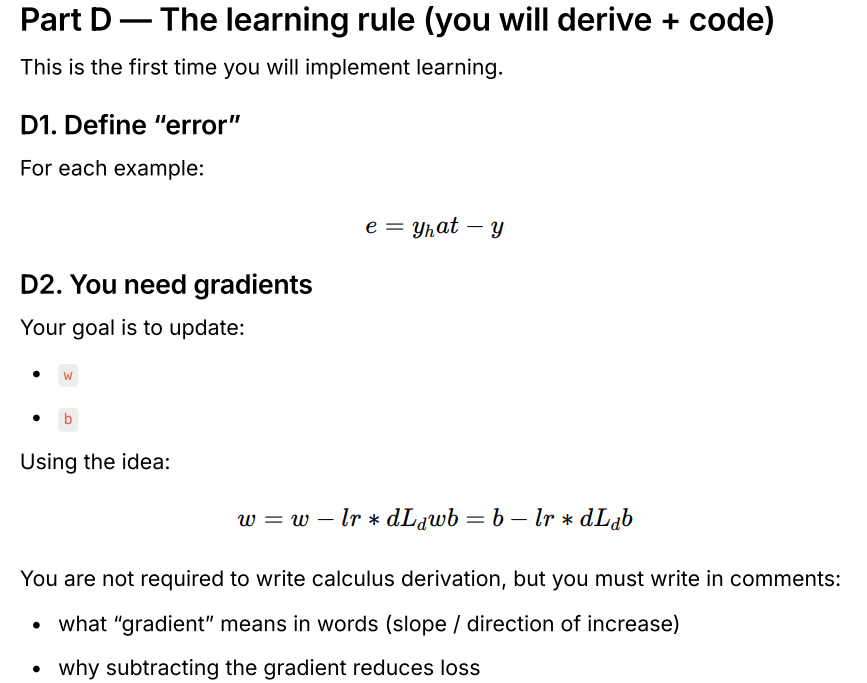

In [ ]:
# Checkpoint:
# What Gradient means in words:  It is the direction in which loss increases the most.
# Why subtracting Gradient reduces loss: Moving opposite to the gradient reduces the loss.

In [27]:
#Gradient Functions
def grad_w(X, y, y_hat):
    N = len(y)
    dW = (2 / N) * X.T @ (y_hat - y)
    return dW

def grad_b(y, y_hat):
    N = len(y)
    db = (2 / N) * np.sum(y_hat - y)
    return db

**Explanation**

**What this step does:**
Computes how weights and bias should change.

**Why it is needed:**
Gradients guide the direction of learning.

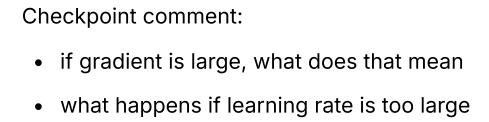

In [ ]:
# Meaning of large Gradient: The model is making large errors and needs big corrections.
# Effect of too-large learning rate: Updates become unstable and loss may diverge.

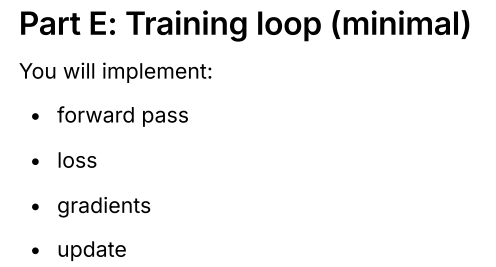

In [28]:
#Part E: Training Loop
# Initialize parameters
d = X_train.shape[1]
w = np.random.randn(d, 1) * 0.01
b = 0.0

lr = 0.01
epochs = 200

for epoch in range(epochs):
    # 1) forward pass
    y_hat = X_train @ w + b

    # 2) compute loss
    loss = mse(y_train, y_hat)

    # 3) compute gradients
    dW = grad_w(X_train, y_train, y_hat)
    db = grad_b(y_train, y_hat)

    # 4) update parameters
    w = w - lr * dW
    b = b - lr * db

    if epoch % 20 == 0:
        print("Epoch:", epoch, "Loss:", loss)

Epoch: 0 Loss: 144.31478555426744
Epoch: 20 Loss: 67.02690737498979
Epoch: 40 Loss: 33.760602609815095
Epoch: 60 Loss: 19.05599228791055
Epoch: 80 Loss: 12.513768926737354
Epoch: 100 Loss: 9.598055303078404
Epoch: 120 Loss: 8.297553759184677
Epoch: 140 Loss: 7.716897556235822
Epoch: 160 Loss: 7.457123337694076
Epoch: 180 Loss: 7.340415525091566


**Explanation**

**What this step does:**
Repeats prediction and updates over many epochs.

**Why it is needed:**
Learning happens gradually through repeated updates.

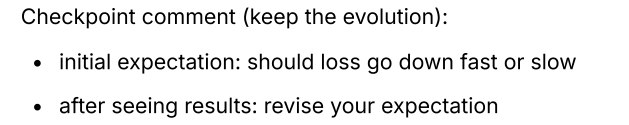

In [ ]:
# Initial expectation: Loss should go down gradually.
# Revised expectation after training: Loss decreases steadily as weights adjust.

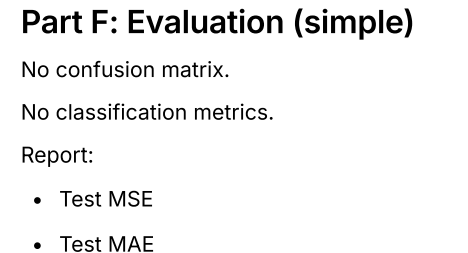

In [29]:
#Part F: Evaluation
#Compute Test Metrics
# Predictions on test set
y_test_hat = X_test @ w + b

# Test MSE
test_mse = np.mean((y_test - y_test_hat) ** 2)

# Test MAE
test_mae = np.mean(np.abs(y_test - y_test_hat))

print("Test MSE:", test_mse)
print("Test MAE:", test_mae)

Test MSE: 4.892702327095343
Test MAE: 1.6582365457687065


**Explanation**

**What this step does:**
Measures prediction error on unseen test data.

**Why it is needed:**
Shows how well the model generalizes.

In [30]:
print("\nSample Predictions:")
for i in range(5):
    true_val = y_test[i][0]
    pred_val = y_test_hat[i][0]
    abs_err = abs(true_val - pred_val)

    print(f"True: {true_val:.2f}, Pred: {pred_val:.2f}, Abs Error: {abs_err:.2f}")


Sample Predictions:
True: 13.50, Pred: 10.99, Abs Error: 2.51
True: 15.50, Pred: 9.55, Abs Error: 5.95
True: 14.50, Pred: 10.19, Abs Error: 4.31
True: 14.50, Pred: 11.11, Abs Error: 3.39
True: 13.50, Pred: 11.05, Abs Error: 2.45


**Explanation**

**What this step does:**
Displays actual vs predicted values.

**Why it is needed:**
Helps understand where the model performs well or poorly.

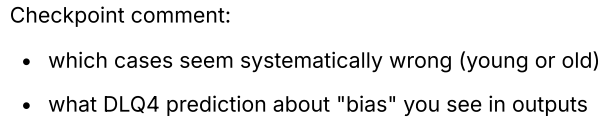

In [ ]:
# Systematic errors: The model tends to underpredict older abalones and overpredict very young ones.
# Observed Bias: Predictions cluster around the average age, showing regression toward the mean.